In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_features = np.array(pd.read_csv('data/train_features_0020.csv', header=None, index_col=False))
train_labels = np.array(pd.read_csv('data/train_labels_0020.csv', header=None, index_col=False))
test_features = np.array(pd.read_csv('data/test_features_0020.csv', header=None, index_col=False))

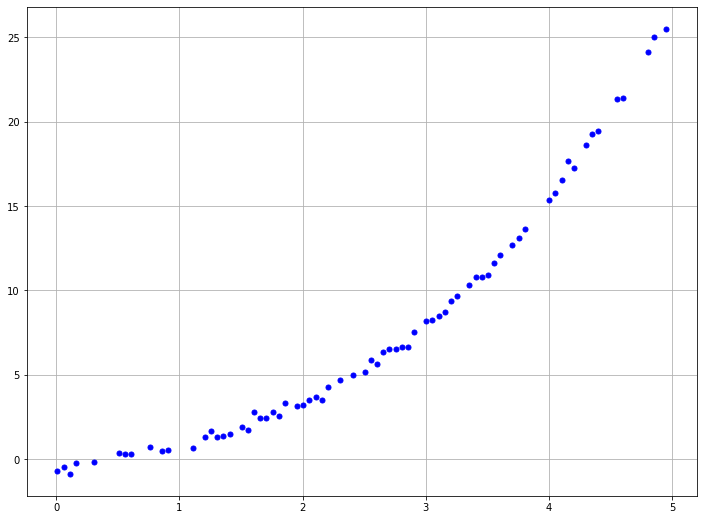

In [3]:
plt.rcParams["figure.figsize"] = (12,9)
plt.figure()
plt.grid()
plt.plot(train_features, train_labels, 'bo', label='Train', markersize=5);

Судя по форме графика, можно сказать, что это показательная функция, зависимость которой высчитывается по формуле
$$y = a^x$$

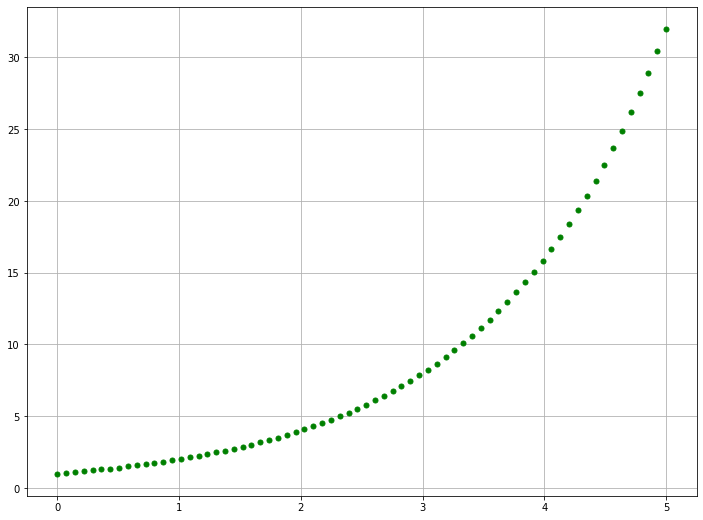

In [4]:
line_x = np.linspace(0, 5, num=70)
line_y = np.array(np.power(2, line_x))
plt.grid()
plt.plot(line_x, line_y, 'go', label='Train', markersize=5);

Для предсказания нелинейных зависимостей добавим фиктивные признаки

In [5]:
x_train = np.hstack((np.array(np.power(2, train_features)),
                     train_features,
                     train_features ** 0))

In [6]:
x_test = np.hstack((np.array(np.power(2, test_features)),
                    test_features,
                    test_features ** 0))

Сформируем вектор-столбец со случайными значениями весов $\theta$ по количеству признаков

In [7]:
theta = np.random.rand(x_train.shape[1]).reshape((x_train.shape[1], 1))

In [8]:
theta

array([[0.62554089],
       [0.74844854],
       [0.75094871]])

Для оценки качества предсказания используем коэффициент детерминации
$$R^2 = 1 - \frac{\sum (y^{(i)} - \hat y^{(i)})^2}{\sum (y^{(i)} - \bar y^{(i)})^2}$$

In [19]:
r2 = 0
alpha = 1e-5
steps = int(1e5)
r2_bound = 0.995

In [20]:
steps

100000

## Градиентный спуск
Алгоритм для поиска оптимальных параметров $\theta$.

Внутри цикла $\bar\theta$ вычисляется следующим образом:
$\bar\theta^{(t)} = \bar\theta^{(t-1)} - \alpha \cdot \frac{1}{n}\left(X^T X \bar\theta - X^T \bar y\right)$

In [21]:
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, train_labels, test_size=0.2)
while r2 < r2_bound:
    for t in range(steps):
        theta -= alpha * (1 / x_train_split.shape[0]) * (x_train_split.transpose().dot(x_train_split).dot(theta)
                                                    - x_train_split.transpose().dot(y_train_split))

    y_test_labels = x_test_split.dot(theta)
    r2 = metrics.r2_score(y_test_split, y_test_labels)
    print('\r', r2, end='')

 0.9968264171115053

На основе полученных на предыдущем шаге весов $\theta$ получаем предсказание для тестовых данных

In [22]:
test_labels = x_test.dot(theta)
train_test_labels = x_train.dot(theta)
pd.DataFrame(test_labels).to_csv('lab1.csv', header=False, index=False)

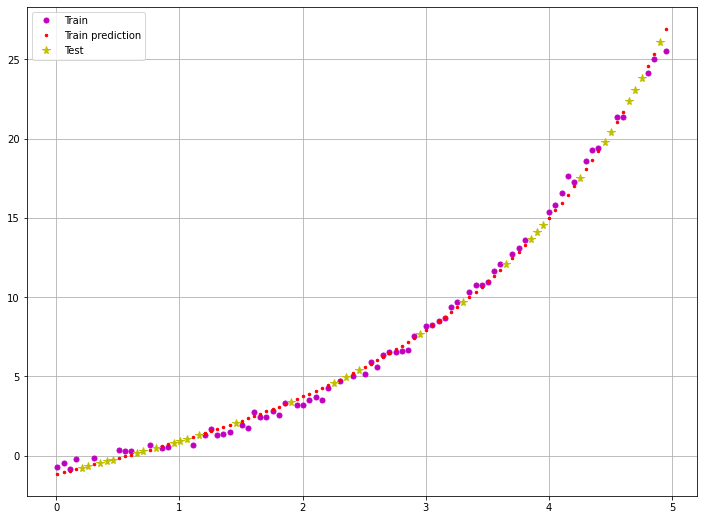

In [23]:
plt.figure()
plt.plot(train_features, train_labels, 'mo', label='Train', markersize=5)
plt.plot(train_features, train_test_labels, 'r.', label='Train prediction', markersize=5)
plt.plot(test_features, test_labels, 'y*', label='Test', markersize=8)
plt.grid()
plt.legend()